# 탐색적 데이터 분석
## #01. 작업준비
### 1. 패키지 참조


In [1]:
import sys
sys.path.append('../')
import helper

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

### 2. 데이터 가져오기

In [3]:
분석데이터 = pd.read_excel('분석용데이터.xlsx')
분석데이터.head()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,3,1000094,182447499,181667733,779766,81108758,83644304,5,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
1,2018,3,1000094,4561081,3428057,1133024,0,4561081,2,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
2,2018,3,1000094,86293109,78208220,8084889,38252844,48040265,1,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
3,2018,3,1000094,93941608,60508224,33433384,45574085,36140265,1,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
4,2018,3,1000094,1692325089,1354744541,337580548,489138378,195886445,1,0,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175


In [7]:
df= 분석데이터.copy()

In [20]:
df['기준_년_코드'].unique()

[2018, 2020, 2021]
Categories (3, int64): [2018, 2020, 2021]

In [17]:
df.loc[(df['기준_분기_코드']==1)&(df['기준_분기_코드']==2),:]

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수


### 3. 명목형 변수에 대한 데이터 타입 변경

In [9]:
df = df.astype({
    '기준_년_코드': 'category', 
    '기준_분기_코드': 'category', 
    'covid19': 'category', 
    '상권_코드': 'category', 
    '상권_코드_명': 'category', 
    '시군구_코드': 'category', 
    '행정동_코드': 'category', 
    '시군구명': 'category', 
    '시군구코드': 'category', 
    '도심': 'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230786 entries, 0 to 230785
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    230786 non-null  category
 1   기준_분기_코드   230786 non-null  category
 2   상권_코드      230786 non-null  category
 3   분기당_매출_금액  230786 non-null  int64   
 4   주중_매출_금액   230786 non-null  int64   
 5   주말_매출_금액   230786 non-null  int64   
 6   남성_매출_금액   230786 non-null  int64   
 7   여성_매출_금액   230786 non-null  int64   
 8   점포수        230786 non-null  int64   
 9   covid19    230786 non-null  category
 10  일과시간_금액    230786 non-null  int64   
 11  일과이후_금액    230786 non-null  int64   
 12  청년금액       230786 non-null  int64   
 13  중년금액       230786 non-null  int64   
 14  장년금액       230786 non-null  int64   
 15  상권_코드_명    230786 non-null  category
 16  엑스좌표_값     230786 non-null  int64   
 17  와이좌표_값     230786 non-null  int64   
 18  시군구_코드     230786 non-null  category
 19  행정

## #02. 연속형 변수에 대한 기초 통계량 확인
### 결측치 확인

In [11]:
len(df)

230786

In [10]:
df.isnull().sum()

기준_년_코드      0
기준_분기_코드     0
상권_코드        0
분기당_매출_금액    0
주중_매출_금액     0
주말_매출_금액     0
남성_매출_금액     0
여성_매출_금액     0
점포수          0
covid19      0
일과시간_금액      0
일과이후_금액      0
청년금액         0
중년금액         0
장년금액         0
상권_코드_명      0
엑스좌표_값       0
와이좌표_값       0
시군구_코드       0
행정동_코드       0
시군구명         0
시군구코드        0
도심           0
총_직장_인구_수    0
총_생활인구_수     0
dtype: int64

In [12]:
tmp = df.drop(['엑스좌표_값','와이좌표_값'],axis=1)
tmp.describe()

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,장년금액,총_직장_인구_수,총_생활인구_수
count,2.307860e+05,2.307860e+05,2.307860e+05,2.307860e+05,2.307860e+05,230786.000000,2.307860e+05,2.307860e+05,2.307860e+05,2.307860e+05,2.307860e+05,230786.000000,2.307860e+05
mean,2.561872e+08,1.950905e+08,6.109678e+07,1.226475e+08,1.044531e+08,4.592514,1.417429e+08,1.144444e+08,8.016949e+07,1.086889e+08,3.824213e+07,7346.752065,3.369329e+06
std,7.734890e+08,6.426825e+08,1.857834e+08,3.744481e+08,3.254877e+08,6.374076,5.412034e+08,3.178897e+08,2.243862e+08,3.666507e+08,1.739776e+08,10734.526298,2.191166e+06
min,5.300000e+01,-7.030190e+07,-6.005364e+07,0.000000e+00,-7.499697e+06,0.000000,-2.392619e+07,-8.692773e+07,-3.685222e+06,0.000000e+00,0.000000e+00,330.000000,1.842200e+04
25%,1.974963e+07,1.471331e+07,2.534030e+06,7.679199e+06,6.658834e+06,2.000000,6.991094e+06,6.528953e+06,3.477155e+06,7.648110e+06,1.005291e+06,2135.000000,1.587401e+06
50%,6.953672e+07,5.188326e+07,1.375939e+07,3.040515e+07,2.696233e+07,3.000000,3.160148e+07,2.657097e+07,1.649304e+07,2.875460e+07,5.976818e+06,3697.000000,2.880459e+06
75%,2.272219e+08,1.718092e+08,5.153559e+07,1.056548e+08,9.189800e+07,5.000000,1.184968e+08,9.457045e+07,6.532072e+07,9.275956e+07,2.535899e+07,7401.000000,4.837716e+06
max,9.334306e+10,9.060803e+10,1.187360e+10,4.468054e+10,2.358525e+10,390.000000,6.369344e+10,2.964962e+10,1.568936e+10,3.420627e+10,1.837016e+10,129323.000000,1.991666e+07


#### 상자그림

In [14]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

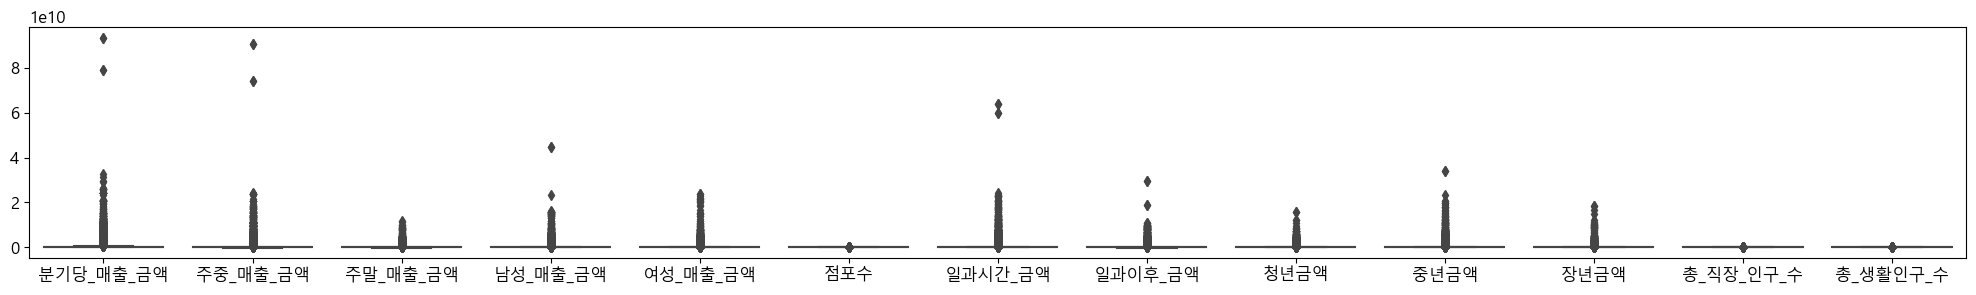

In [15]:
plt.figure(figsize=(25, 3))
sb.boxplot(tmp)
plt.show()
plt.close()